In [25]:
import csv
import os

# Set the column names
column_names = ['File', 'Frame', 'Label', 'Confidence Score']

# Define the output CSV file path
output_file = 'combined_data.csv'

# Initialize the CSV writer
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(column_names)

    # Loop through the text files
    for file_name in os.listdir('.'):
        if file_name.endswith('.txt'):
            with open(file_name, 'r') as txtfile:
                lines = txtfile.readlines()
                for line in lines:
                    # Split the line by comma and extract the values
                    values = line.strip().split(',')
                    file_info = values[0]
                    frame_info = values[1]
                    label = values[2]
                    confidence = values[3]

                    # Write the values to the CSV file
                    writer.writerow([file_info, frame_info, label, confidence])

print('Conversion completed. The data has been saved to', output_file)



Conversion completed. The data has been saved to combined_data.csv


In [26]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('combined_data.csv')


In [45]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'File' column
label_encoder = LabelEncoder()
df['File'] = label_encoder.fit_transform(df['File'])
# Label encode the 'Frame' column
df['Frame'] = label_encoder.fit_transform(df['Frame'])

In [46]:
# Assuming the input features are stored in columns 'File', 'Frame', and 'Confidence Score'
# and the output label is stored in the column 'Label'
X = df[['File', 'Frame', 'Confidence Score']]
y = df['Label']


In [47]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
print(df.head(10))


   File  Frame  Label  Confidence Score
0     0      0      1          0.434810
1     0     25      0          0.343729
2     0     51      1          0.712848
3     0     61      0          0.334875
4     0     81      1          0.462185
5     0    103      0          0.374878
6     0    123      1          0.437471
7     0    143      0          0.344431
8     0    169      0          0.331099
9     0    183      1          0.490142


In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier as the base model
base_model = DecisionTreeClassifier()


In [50]:
# Fit the model on the training data
base_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = base_model.predict(X_test)


In [51]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Base Model Accuracy:', accuracy)


Base Model Accuracy: 0.7998579293198366


In [52]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# Create a voting classifier with the base model and additional classifiers
voting_classifier = VotingClassifier(estimators=[('base', base_model), ('rf', RandomForestClassifier())])

# Fit the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_classifier.predict(X_test)


In [53]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Create an AdaBoost classifier with the base model
adaboost_classifier = AdaBoostClassifier(base_estimator=base_model)

# Fit the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions using the AdaBoost classifier
y_pred_adaboost = adaboost_classifier.predict(X_test)


C:\Users\PSK\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [54]:
accuracy_voting = accuracy_score(y_test, y_pred_voting)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print('Voting Classifier Accuracy:', accuracy_voting)
print('AdaBoost Classifier Accuracy:', accuracy_adaboost)


Voting Classifier Accuracy: 0.8348428343100692
AdaBoost Classifier Accuracy: 0.7984372225182028


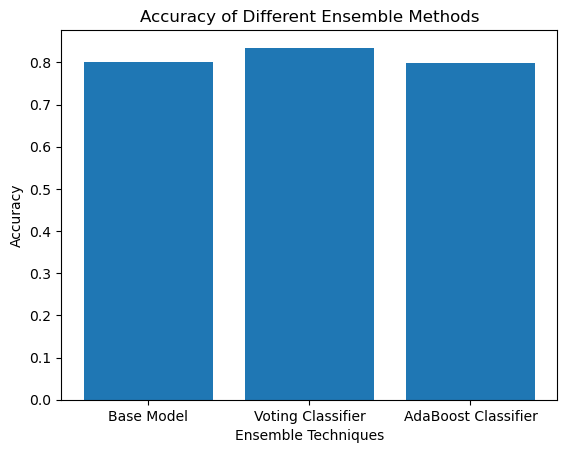

In [55]:
import matplotlib.pyplot as plt

methods = ['Base Model', 'Voting Classifier', 'AdaBoost Classifier']
accuracies = [accuracy, accuracy_voting, accuracy_adaboost]

plt.bar(methods, accuracies)
plt.xlabel('Ensemble Techniques')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Ensemble Methods')
plt.show()
